nyoba lagi

C:\Users\User\AppData\Local\Temp\ipykernel_14340\1706110560.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('dischromic  patches', 0)
C:\Users\User\AppData\Local\Temp\ipykernel_14340\1706110560.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('spotting  urination',0)
C:\Users\User\AppData\Local\Temp\ipykernel_14340\1706110560.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_ob

(3936, 17) (984, 17) (3936,) (984,)
F1-score% = 95.7812664665753 | Accuracy% = 95.83333333333334
Mean Accuracy: 95.706%, Standard Deviation: (1.99%)
Mean Accuracy: 94.198%, Standard Deviation: (3.57%)
[3 5 3 5 4 4 3 2 3 0 0 0 0 0 0 0 0]
Migraine
F1-score% = 99.58380389536958 | Accuracy% = 99.59349593495935
Mean Accuracy: 99.187%, Standard Deviation: (0.44%)
Mean Accuracy: 98.575%, Standard Deviation: (1.31%)


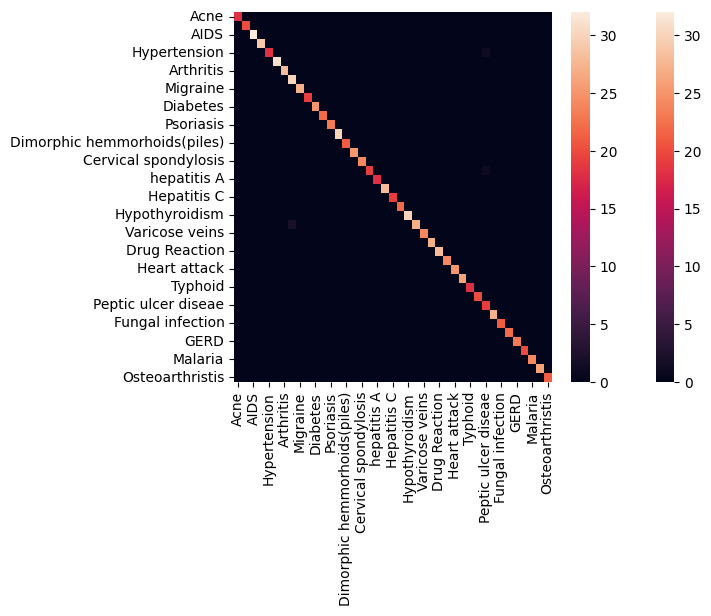

In [46]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, precision_score, roc_curve
import seaborn as sns
from sklearn.utils import shuffle
#from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#from sklearn.metrics import plot_roc_curve 

df = pd.read_csv('dataset.csv')
df = shuffle(df,random_state=42)
df.head()

#removing _
for col in df.columns:
    
    df[col] = df[col].str.replace('_',' ')
df.head()
df.describe()

#remove the trailing space fromm the symptom columns
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

#fill the nan values with zero
df = df.fillna(0)
df.head()

##dataset 2
df1 = pd.read_csv('Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()
df1['Symptom'].unique()

#encode symptoms in the data with the symptom rank
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

#assign symptoms no rank to zero
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

#select the features as symptoms column and labels as disease column
data = df.iloc[:,1:].values
labels = df['Disease'].values

#split the dataset to training and testing
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

##decision tree
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

#randomforest
rfc=RandomForestClassifier(random_state=42)
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
print(x_test[0])
print(preds[0])
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

discrp = pd.read_csv("symptom_Description.csv")
discrp.head()

ektra7at = pd.read_csv("symptom_precaution.csv")
ektra7at.head()

medicine = pd.read_csv('symptoms-medicine.csv', delimiter=';')

#save random forest model
joblib.dump(rfc, "random_forest.joblib")

loaded_rf = joblib.load("random_forest.joblib")

In [49]:
#list symptoms
sympList=df1["Symptom"].to_list()
sympList

['itching',
 'skin rash',
 'nodal skin eruptions',
 'continuous sneezing',
 'shivering',
 'chills',
 'joint pain',
 'stomach pain',
 'acidity',
 'ulcers on tongue',
 'muscle wasting',
 'vomiting',
 'burning micturition',
 'spotting urination',
 'fatigue',
 'weight gain',
 'anxiety',
 'cold hands and feets',
 'mood swings',
 'weight loss',
 'restlessness',
 'lethargy',
 'patches in throat',
 'irregular sugar level',
 'cough',
 'high fever',
 'sunken eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish skin',
 'dark urine',
 'nausea',
 'loss of appetite',
 'pain behind the eyes',
 'back pain',
 'constipation',
 'abdominal pain',
 'diarrhoea',
 'mild fever',
 'yellow urine',
 'yellowing of eyes',
 'acute liver failure',
 'fluid overload',
 'swelling of stomach',
 'swelled lymph nodes',
 'malaise',
 'blurred and distorted vision',
 'phlegm',
 'throat irritation',
 'redness of eyes',
 'sinus pressure',
 'runny nose',
 'congestion',
 'chest pain',
 

In [47]:
def predd(model, *args):
    #define a list to hold symptom weights
    psymptoms = []
    
    #iterate through all provided symptoms
    for symptom in args:
        #check if the symptom exists in the dataset
        if symptom in df1['Symptom'].values:
            #if the symptom exists, append its weight to the list
            weight = df1[df1['Symptom'] == symptom]['weight'].values[0]
            psymptoms.append(weight)
        else:
            print(f"Symptom '{symptom}' not found in the dataset. Assuming weight 0.")
            #if the symptom doesn't exist, append 0 to the list
            psymptoms.append(0)
    
    #pad the list with zeros if the number of symptoms provided is less than 17
    while len(psymptoms) < 17:
        psymptoms.append(0)
    
    #predict using the model
    pred2 = model.predict([psymptoms])
    
    #print prediction, description, medications, and precautions
    disp = discrp[discrp['Disease'] == pred2[0]]['Description'].values[0]
    recomnd = ektra7at[ektra7at['Disease'] == pred2[0]].values[0][1:]
    meds = medicine[medicine['Disease'] == pred2[0]]['Medications'].values[0].split(', ')
    
    print("Your Symptoms:",  ', '.join(user_symptoms))
    print("The Disease Name:", pred2[0])
    print("The Disease Description:", disp)
    print("Medicine:", ', '.join(meds))
    print("Recommended Things to do at home:")
    for precaution in recomnd:
        print(precaution)

In [48]:
#get user input for symptoms
user_symptoms = input("Enter the symptoms separated by a comma (e.g., itching, skin rash, cough): ")

#split user input by comma and strip whitespaces
user_symptoms = [symptom.strip() for symptom in user_symptoms.split(',')]

#call the prediction function with user input
predd(rnd_forest, *user_symptoms)

Your Symptoms: itching, skin rash, nodal skin eruptions
The Disease Name: Fungal infection
The Disease Description: In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.
Medicine: Fluconazole, Itraconazole, Clotrimazole
Recommended Things to do at home:
bath twice
use detol or neem in bathing water
keep infected area dry
use clean cloths
